<a href="https://colab.research.google.com/github/walid-prog/progalere/blob/main/BIO3360_Final_Exam_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Identify yourself here:

Student name: #################

Student number: ##################

# BIO3360 Final Exam#

#Instructions#

This final exam contains 5 questions for a total of 30 points (30% of your final grade). The number of points allocated to each question can be found beside the question number. The final exam follows the same format as the assignments and midterm. As such, the question style and expected answer format should be familiar to you by now. Over the past months, you have worked hard to develop programs and solutions for many problems similar to those found here. Some codes you wrote in the past will surely help you!

YOU HAVE 48HRS TO COMPLETE AND SUBMIT THE EXAM (FIRM). **Students registered with the SASS are asked to contact me directly before the exam. **

THIS IS A FINAL EVALUATION THAT MUST BE DONE ALONE. **Copy-pasting code found online or between each other will be considered as plagiarism. And this is easy to verify** (Already happened this semester - so trust me!).  

**Please download this colab notebook as a .ipynb and upload it just has you have for the assignments and midterm.  In addition to your information (Name, Student number), your Colab notebook has to be uploaded below according to specific guidelines: All submitted files MUST have the following format or will be rejected: Final - Student Number. (e.g. Final - 123456789 ). Make sure the .ipynb extension appears after your file name, otherwise add it manually.**

Below is a series of questions that need to be answered. Your "answers" are to be written in the code cells below the question statements. To get points, the output of your code cell must match the expected answer. If you need to annotate your code cell, or make comments, use `#` before your comment. The line will be ignored by the compiler, but remain visible. E.g. `#this is a comment`

Be careful with variable assignment and make sure you import libraries where necessary (i.e. all the time). 

First, please write your name and student number in the text cell above.

Have fun! :-)

## Question 1 (6 points)

You are the chief public health officer of a small town, in charge of managing local public health policies and sanitary measures during the Covid-19 pandemic. It is up to you whether to recommend a lockdown, or conversely, to loosen restrictions in the community. 

Test centers are sending you two daily updates, one at noon and the other at midnight, updating your office with the most recent recorded number of cases. Over the last 28 days, here is the data that was collected:`please run the code cell below`

days T = [ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5]
Number of detected covid-19 cases P= [ 4.66239028  6.00102101  5.36446308  8.30940165  6.31648625  7.91905872
  4.54894872  8.64706167  8.3426461   6.38973557  7.43604833  7.6221141
  6.83356049  8.79719474  6.99887782 10.63201418 10.67600199 11.9126681
 11.23935427  8.47264477  9.15562405  8.69467928  9.10278909 10.22107218
 10.19992442 13.17709712 12.37193923 15.1934457  14.31548435 15.39966665
 14.86454867 18.44757711 16.08639901 18.10828619 21.37895274 21.41281072
 22.23036011 21.97014809 21.53593781 24.88975763 25.0780565  26.05274138
 28.48612086 27.57283934 30.07693507 29.51882695 31.81648429 35.45717339
 34.13175222 37.16158685 37.78664184 40.5264344  44.46919786 44.312867
 47.36070037 50.

Text(0, 0.5, 'Number of detected covid-19 cases (Array P)')

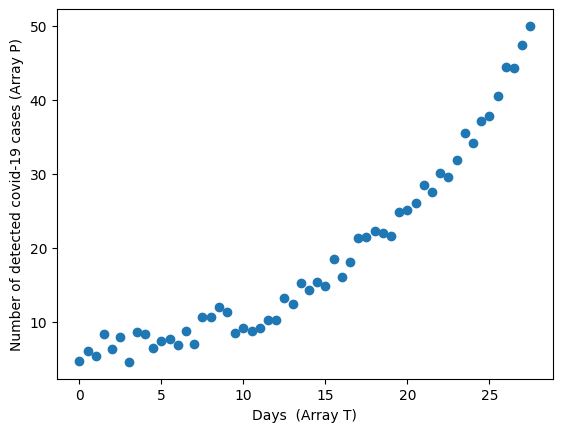

In [ ]:
#@title Data
import numpy as np
from matplotlib import pyplot as plt
Noise_intensity = 5
A = 3
B = 0.1

T=np.arange(0,28,0.5 )# your aray of injected currents
P=np.zeros(len(T)) # your recorded membrane voltage
Noise = np.random.rand(len(T))
for i in range(len(T)) :
  P[i] = A*np.exp(B*T[i])+Noise_intensity*Noise[i]
print('days T =',T)
print('Number of detected covid-19 cases P=',P)
plt.plot(T,P,'o')
plt.xlabel('Days  (Array T)')
plt.ylabel('Number of detected covid-19 cases (Array P)')





The Mayor is asking for your opinion on the best way to proceed in the upcoming months, including whether or not reinforce restrictions, and to what extent. You need to fit the data to make evidence-based decisions and predict the evolution of the future number of cases solely based on available data. 

The data has been saved into two arrays: `P`(number of cases) and `T` (time/days). The dimensions of these arrays are `len(P)=len(T)= 28/0.5=56`.

a) (1 point) Based on what we have learned about the epidemiology models and population growth models, what is the most likely model underlying the trend observed in the data? (e.g. Linear, quadratic, logarithmic?)

b) (2 point) Assuming exponential growth, a good model for the ground truth $P$ would then be $\tilde P=A e^{B T}$ with parameters $a$ and $b$. However, fitting exponential functions with gradient descent is notoriouly challenging because of the extremely fast fluctuations in the gradient, and multiple optima. One trick is to take the natural logarithm to obtain a linear function of time instead:

$$ln[\tilde{P}] = ln[A]+B T= a + bT \space   \space \space\space\space\space\space(1)$$

with $a=ln[A]$ and $b=B$. In that case, it would make sense to minimize the mean square error(MSE) between $ln[\tilde{P}]$ and $ln[P]$. 

Compute the gradient of the MSE as a function $a$ and $b$ and create functions called `Grad_a_MSE(X,Y,param1, param2)` and `Grad_b_MSE(X,Y,param1, param2)` that take into inputs arrays `X` and `Y` as well as two parameters `param1` and `param2` and ouputs the gradient, assuming a linear function as per Eq. (1) above.  

c) (1 point) Using gradient descent, with learning rates $\epsilon_a=\epsilon_b=0.001$ and 10000 epochs, find the values of a and b. Choose initial values for $a$ and $b$ arbitrarily within the interval [-10,10]. Print converged values for both parameters. Does increasing the number of epochs help?(HINT: the natural logarithm of `x` is `np.log(x)`) 

d) (1 point) Plot your fitted model (i.e. $\tilde{P}$ vs $T$ with parameters $a$ and $b$) alongside the data (i.e. $P$ versus $T$). Is the fit good? Don't forget axis labels and title. (HINT: Your cuves and data should be exponentially looking, dont forget the natural logarithm was taken above to perform gradient descent) 

e) (1 point) The "true" values of the parameters used to generate the data (hidden code cell at the top of the notebook) were `A = 3` and `B = 0.1`. How close to they compare to those you computed? Using your code in parts a) and b), determine the number of iterations needed to obtain a value of `a` within 10% of `A`. 



##Question 2 (6 points)


Summeritis is a mysterious infectious disease that occurs when daytime temperatures reach 17°C and the sun starts to set after 8pm, causing university students to lack the motivation to study for their winter final exams. Once infected, students lose motivation gradually and start partying while inviting others to join them to enjoy any kind of non-scholarly activity. Result: students start to party *en masse* instead of studying. A very dramatic situation! Thankfully, susceptible(yet not infected) students try to convince their peers to stay in and study instead, causing some resistance to summeritis spread. 

We can use a sigthly modified version of the SIR formalism to model a summeritis epidemic. Consider the following variables:  $S$ :Number of susceptible students;  $I$ : number of infected students (seeing others partying, motivation will decrease and after a while they will start partying as well); and  $P$ : number of partying students (inviting their peers to join the party and infecting them with summeritis). The equations are  

$\frac{dS}{dt} = -a S P$

$\frac{dI}{dt} = a S P -b I $

$\frac{dP}{dt} = b I - d S P$

where the parameters $a$,$b$ and $d$ refer to the *transmission rate* and *recovery rate* and *resistance rate*, respectively. The second term in the last equation (i.e. $-dSP$) represents peer pressure and models the effect of susceptible students convincing their peers of staying in to study (i.e. resisting the spread of the disease). Note that those parameters are rate, and will here be expressed in units of hours^-1 (or "per hour"). Assume we have a population of $N=20000$ students, one infected student (i.e. $I(0)=1$) and that there is initially no partying ($P(0)=0$) students on campus. Parameter values are:

$$a=0.01$$ 
$$b=1/10 $$
$$d=0.008 $$

a) (1 point) Assume that $ d=0 $ (just for this question, not the following ones!) and that $ S+I+P=N $ is always preserved, find the fixed points of the equations above. 

b) (1 point) Assume $S$ is constant at its initial value (i.e. $S(0)$) and that for this short period we can assume $P=I$. Use the second equation (i.e. $\frac{dI}{dt}=...$) with these assumptions to compute the value of $R_o$. Is there an epidemic spread?  

c) (1.5 point) Using the Euler method, and for the parameter values listed above (i.e. $a$, $b$ and $d$ are not zero and there are no assumptions on any variable), plot the evolution of the variables $ S(t)$ ,  $I(t)$  and  $P(t)$ on campus, for a period of the exam season (20 days of 24 hours each), with  $dt=0.01$ hours. Is  $S+I+P$ conserved here? Why? Make sure your initial conditions are correct (read the question carefully!) and don't forget axes labels and title.

d)  (1.5 point) At what value of the resistance rate $d$ is the summeritis epidemic on campus controlled (i.e. does not happen)? (HINT: Consider the fixed point, especially equations  $dI/dt=0$  and  $dP/dt=0$  together - what do these equation say about the parameters  $a$  and  $d$ ?)

e) (1 point) A zealous professor walks around campus to crash ongoing parties and decrease the number of partying students. Assuming this leads to a decrease the partying population at a rate $e=6$ per hour, modify the SIP model above and implement this change. Then, simulate the system again for a period of 20 days with  $dt=0.01$, including axis labels and title. How many students didnt have summeritis at the end of the exam period? 
(HINT: you need to modify the $dP/dt$ equation and include an exponential decay term propotional to $P$ with rate $e$) 



## Question 3 (6 points) 

Oscillatory bursting is a peculiar form of neural action potential discharge pattern that is observed in a wide variety of brain systems, notably the hippocampus of mammals. Instead of firing action potentials at a steady rate, neurons produce action potentials in "groups" - a brief sequence of temporally clustered action potentials, which repeat periodically. This type of firing activity, notably displayed by the pyramidal neurons of the CA3 region of the hippocampus, give rise to the famous theta ($\theta$) rhythm. This oscillatory activity has been linked to memory encoding and spatial navigation in rodents and humans alike, although the mechanisms involved are still much debated by neuroscientists. A neural burst firing pattern is plotted in the figure below:


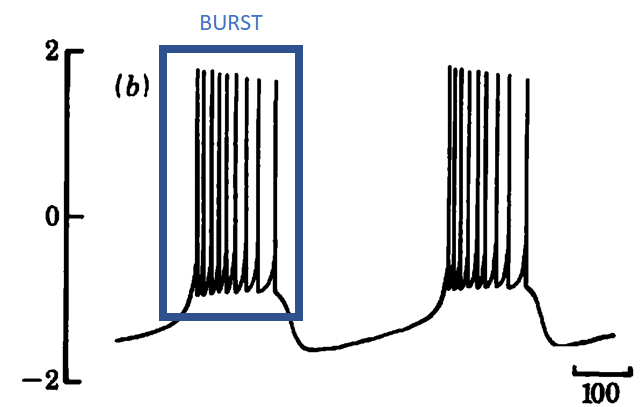


To model this type of firing activity, [JL Hindmarsh and RM Rose](https://royalsocietypublishing.org/doi/pdf/10.1098/rspb.1984.0024?casa_token=ZSkGQniiwB8AAAAA:UlF7TpssDGALsg9hffVPeCwtZegvWmZnz3egWKAd7XN8F2EDPdCzacjMPyDUkneWGKECtTc08wXj5eHK) developped in 1894 a qualitative mathematical model of neuronal bursting, inspired by both Fitzhugh-Nagumo and Hodgkin–Huxley models. The so-called Hindmarsh-Rose model obeys the following set of non-dimensional (i.e. unitless) first order differential equations


$$\frac{d}{dt} x(t) = y(t)-a x^3(t)+b x^2(t)-z(t)+I$$

$$\frac{d}{dt} y(t) = c-d x^2(t)-y(t)$$
 
$$\frac{d}{dt} z(t) = r(s(x(t)-x_r)-z(t))$$

With the parameters $a,b,c,d,r,s, x_r$ and the synaptic input $I$. The relevant observable variable is the *membrane potential*, $x(t)$. There are two more variables, $y(t)$ and $z(t)$, which take into account the transport of ions across the membrane through  ion channels. The transport of sodium  (Na+) and potassium (K+) ions through the ion channels is modelled by the variable $y(t)$, which is called the *spiking variable*. The variable $z(t)$ corresponds to an *adaptation current* - through which the membrane potential is damped, representing the slow habituation of neurons to constant stimuli. It represents the slow fatigue of ion channels after sustained ion transit.  Parameter values used are:

$$a=1$$
$$b=2.9$$
$$c=1$$
$$d=5$$
$$s=10$$
$$x_r=-6/5$$
$$r=0.001$$
$$I=variable$$

a) (1.5 point) Let us first neglect the adaptation current by setting $r=0$ which means $z(t)=0$. This means the Hindmarsh-Rose model becomes two dimensional, in $x$ and $y$ only. Assuming $c=0$ and $I=0$, compute (mathematically) and plot the nullclines of $x$ and $y$ with $x$ ranging from -3 to 3 by steps of 0.1.

b) (1.5 point) Assuming again that $r=0$ (i.e. $z(t)=0$),  $c=0$ and $I=0$, compute the fixed point(s). How many fixed point(s) are there? 

c) (1 point) Oscillatory Bursting in the Hindmarsh-Rose model occurs because of the presence of a limit cycle - an oscillatory solution that emerges due to the cubic non-linearity. For $r=0$, $c=0$ and $I=0$, plot the flow of the system in the $x$ and $y$ plane, alongside the nullclines computed in a). Use initial conditions ranging from -3 to 3 by steps of 0.5 for $x$, and -3 to 3 by steps of 0.5 for $y$. Integrate your equations using the Euler method for a short time $T=0.5$ms with steps of $dt=0.01$.

d) (1 point) Using the Euler method and the parameter values in the Question Statement above part a (i.e. here $s$ and $c$ are *NOT* zero), plot the time evolution of the membrane potential $x(t)$ over a period of $T=2000$ms with $dt=0.01$ for I=0.2. Initial conditions are $x(0)=1$, $y(0)$ and $z(0)=0$. Don't forget title and axes labels. 

e) (1 point) Using the code developed in d), compute and plot 1) the number of spikes; and 2) the number of bursts; as a function of inputs $I$ ranging from -2 to 2 by steps of 0.2. Use a total time of T=1000ms with dt=0.01. Comment on the effect of inputs on bursting and spiking. 


HINT: define variables `threshold_spike=1.0` and `threshold_burst=-1.2`, and at every time step, check whether `(x[t+1]>threshold_spike and x[t]<threshold_spike)`. If you examine this closely, you'll notice that this will detect times where the membrane voltage $x$ crosses the value of `threshold_spike` from below. The same logic applies for `threshold_bursts`, only based on a different value. Once a spike or burst is detected, you can simply count the number of each during the total period of the simulation, and repeat for a different value of `I`. Then plot the resulting values obtained as a function of `I`.



###Question 4 (6 points)

A chromosome nucleic acid sequence can be modelled using a Markov chain model in which each nucleotide (A, T, G, C) represents given state. For the purpose of this question we will consider

State 0 = A

State 1 = T

State 2 = G

State 3 = C 

Transitions between different nucleotide in a sequence follow a given probability. For instance $P_{03}$ represents the probability of having a sequence AC, $P_{23}$ represents the probability of having a sequence GC, and so on.  

Chromosome sequences - and the probability of transitioning between nucleotides -  can be disturbed under different circumstances. In this question we will investigate what will happen under normal and UV light conditions. 

Two matrices, called `P_normal`. and `P_uvlight` which contain transitions probability in each case are given below (you must run the code cell below). 

In [ ]:
#Please run this code cell 
#Use the following matrices: 
P_normal = [[0.899,0.1, 0.00, 0.000],
            [0.5, 0.2, 0.14, 0.16],
            [0.08, 0.005, 0.015, 0.9],
            [0.00, 0.00, 0.06, 0.94]]
P_uvlight =  [[0.6, 0.3, 0.1, 0.0],
              [0.00, 0.9, 0.03, 0.07],
              [0.003, 0.01, 0.96, 0.001],
              [0.02, 0.38, 0.5, 0.1]]



a) (1 point) Create a Markov model diagram for this system. An example for such a diagram can be found in Question 1 of Assignment 8 (this is just an example). You can do this in several ways, such as using Google Paint or drawing on a notepad and uploading the image to this notebook. Make sure to include labels on your diagram!  

b) (1.5 point) Define an array `State_chromseq` of appropriate length whose value will be `0`,`1`, `2` or `3`, corresponding to the different states/nucleotide above. Using a Markov chain model based on the transition probabilities matrices in the code cell below, and for `State_chromseq[0]=0`, plot the evolution of the chromosome sequence states during normal (i.e. use the probabilities found in the matrix `P_normal`) circumstances as a function of time for a total of 57 600 seconds(16 hours) by steps of dt=10 seconds. Don't forget the title and axes labels.

HINT: Because all probabilities in a given row sum to 1, so you can use the following trick:

Let's assume that `State_chromseq[t]=0`. If your random number `prob` is found between 0 and $P_{00}$, then `State_chromseq[t+1]=0` (i.e. the nucleotide remains the same). If `prob` is instead found between $P_{00}$ and $P_{00}+P_{01}$, then `State_chromseq` will transition from `0` to `1` and thus `State_chromseq[t+1]=1`. Similarly, if `prob` is found between  $P_{00}+P_{01}$ and  $P_{00}+P_{01}+P_{02}$, `State_chromseq[t+1]=2`. Finally, if `prob` is between  $P_{00}+P_{01}+P_{02}$ and $1$ (remember $P_{00}+P_{01}+P_{02}+P_{03}=1$!), then `State_chromseq[t+1]=3`. You can easily evaluate these different conditions using an `if` statement. For instance, if `State_chromseq[t]=0`, you can check: `if (P_normal[0][0]<=prob<P_normal[0][0]+P[0][1])` and so on. A diagram summarizing this can be found below. Youve done the same in Assignment 8, but now we have 4 states instead of 3!

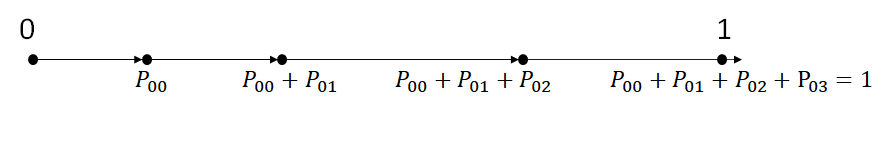

c) (1.5 point) Repeat the problem in b) for exposure to UV light (i.e. use the probabilities found in the matrix `P_uvlight`). Define an analogous array `State_uvlight` whose value will change in time but now as a function of `P_uvlight`. Plot the resulting time evolution of the chromosome sequence states. 

d) (1 point) Based on the `State_chromseq` and `State_light` arrays, plot and compare histograms of the **time** spent (i.e. residence times distributions) in under each condition (normal and uv light). Comment on the differences. What can you conclude about what is happening to the chromosome sequence under UV light?

e) (1 point) Count and print the number of A (i.e. State 0) and T (i.e. State 1) nucleotides that will appear under both normal conditions (P_normal) and under UV light conditions (P_uvlight). What can you conclude? 

##Question 5 (6 points)


Corals are marine invertebrates that typically live in colonies of genetically identical individual polyps.  Polyps excretes an exoskeleton near the base. Over many generations, the colony thus creates a skeleton characteristic of the species which can measure up to several meters in size. Individual colonies grow by asexual reproduction. 

Coral polulations or colonies are very aggressive, despite their deceptive appearance. Polyps compete for resources such as nutrients, light and space and the outcome of resource-based competition determines population growth, that is, whether a coral colony will endure and spread, or dissapear. Such resource-based competition can be intraspecific, meaning amongst the same coral species, or interspecific, that is between coral species within a common environment. When an foreign coral is encroaching on their space, they can deploy chemical warfare to counter their rival. Often, coral fights end in one of the corals being killed by the other. While the corals are not predators of each other, the competition still ends in the death of one of the corals. 

Ocean acidification (OA) has been demonstrated to not only hinder coral growth, but impact their competition dynamics. Some species become more aggressive, and the balance of intra/inter-specific competition is broken with unknown outcomes, not only on coral reef ecosystems, but across the oceans. 

Reference: https://www.nature.com/articles/srep40288 (you may want to read this later)

Consider two populations of Indo-Pacific reef-building coral species : *Galaxea fascicularis* (population size $N_1$  - thousands/$m^2$ on sea floor) and *Pocillopora damicornis* (population size $N_2$ - thousands/$m^2$ on sea floor). These species are competing for space and resources. We may use a combination of the logistic growth and Lotka-Volerra models to describe their mutually competitive dynamics. The equations are the following:

$$\frac{dN_1}{dt} = r_1 N_1 \left(1 - \left(\frac{\alpha_{21}N_2+N_1}{K}\right)\right)$$
$$\frac{dN_2}{dt} = r_2 N_2 \left(1-\left(\frac{\alpha_{12}N_1+N_2}{K}\right)\right)$$

where $r_1$, $r_2$ are growth rates, and $K$ is the local environment carrying capacity. The coefficients $\alpha_{12}\geq 1$ and $\alpha_{21} \geq 1$ represent the intensity of the competition from *Pocillopora* to *Galaxea* ($\alpha_{21}$), and the other way around ($\alpha_{12}$). When the pH is  normal (i.e. no OA), parameters values are:  $r_1=r_2=0.05$, $\alpha_{12}=\alpha_{21}=0.6$. Assume $K=1$.

Competitive symbiosis occurs if both species can subsist (i.e. neither $N_1=0$ or $N_2=0$). Otherwise, one population will go extinct by losing the competition. 

a) (1 point) What are the fixed points of this model as a function of the parameters? Find the solution analytically (i.e. using math). (HINT: There are four)

b) (1 point) Compute and plot the nullclines for $N_1$ and $N_2$ in the $(N_1,N_2)$ plane for normal pH conditions. Don't forget axes labels and a title. 

c) (1 point) Based on the nullcline calculations in b), compute the flow in $(N_1, N_2)$ space in normal pH conditions, alongside your nullclines. Describe as a comment the dynamics and on the stability of the fixed points (qualitatively). Use initial conductions for $N_1$ and $N_2$ ranging from $[0,1]$. Does symbiosis occur?

d) (1 point) Using the Euler method, plot the time evolution of both *Pocillopora* and *Galaxea* populations in normal pH conditions for a period of 1000 years with steps of $dt=0.1$ years with initial conditions $N_1(0)=0.2$ thousands/$m^3$ and $N_2(0)=0.5$ thousands/$m^3$. What is the final population size of both coral species? Don't forget axes labels and a title. 

e) (1 point) Prolonged exposure to CO2 will provoke ocean acidification that will impact the competitive dynamics between *Pocillopora* and *Galaxea*. Notably, *Galaxea* becomes very agressive in lower pH waters.  Using your code developed in d), model a sudden change in competitive rate: At $T=500$ years, the competition rate of *Galaxea* towards *Pocillopora* ($\alpha_{12}$) increases from $0.6$ to $1.3$ and remains elevated. How does this affect the competitve dynamics between the two coral populations? What happens to the final population sizes after the 1000 years?

f) (1 point) After $700$ years of monitoring the populations of *Galaxea* and *Pocillopora*, an infection caused widespread disease in *Galaxea*. From the modelling perspective, this infection killed 99% of *Galaxea* population. Use your code from part e) and plot the time evolution of both populations using the Euler method. What happens to the *Galaxea* population? What effect does this have on the *Pocillopora* population after 1000 years?

HINT: use the same conditions as question e) where at $T=500$ years, $\alpha_{12}$ changes to $1.3$, and also at $T=700$ years, $N1$ is is reduced by 99% of its value.
